<a href="https://colab.research.google.com/github/sapritanand/Trade-Book-Analytics-/blob/main/TradeBookAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Assignment __ Trading Analyst - Decax.csv')
df.head()

,Index,Positions,Account Margin,Expiry/Non Expiry,Entry,EntryOrderID,Entry_Time,Entry_Price,Entry_PCR,SL,...,Exit_imp_vol,Exit_delta,Exit_gamma,Exit_theta,Exit_vega,Exit_rho,fund,ce_strike,trading_symbol,pe_strike
0,BANKNIFTY,BANKNIFTY23O0446100CE_1,200000.0,Expiry,True,[231121200331050],2023-10-04 13:01:06.332000,1.00,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,200000.0,BANKNIFTY23O0446100CE,BANKNIFTY23O04,NaN
1,BANKNIFTY,BANKNIFTY23O0441700PE_1,200000.0,Expiry,True,[231121200331871],2023-10-04 13:01:08.281000,0.65,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,200000.0,NaN,BANKNIFTY23O04,BANKNIFTY23O0441700PE
2,BANKNIFTY,BANKNIFTY23O0443900CE_2,200000.0,Expiry,True,[231121200333037],2023-10-04 13:01:12.989000,37.70,1.18,46.371,...,6.518139,0.51584,0.003184,-27.700885,4.088280,0.275554,200000.0,BANKNIFTY23O0443900CE,BANKNIFTY23O04,NaN
3,BANKNIFTY,BANKNIFTY23O0443900PE_2,200000.0,Expiry,True,[231121200333474],2023-10-04 13:01:14.597000,56.00,1.18,68.880,...,6.584942,-0.48401,0.003184,-22.333014,4.088226,-0.261200,200000.0,NaN,BANKNIFTY23O04,BANKNIFTY23O0443900PE
4,BANKNIFTY,BANKNIFTY23O0446100CE_1,200000.0,Expiry,True,[231121200751261],2023-10-04 13:32:07.092000,1.00,0.85,0.000,...,-1.000000,0.59222,0.003075,-27.670583,3.986657,0.316586,200000.0,BANKNIFTY23O0446100CE,BANKNIFTY23O04,NaN


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Assignment __ Trading Analyst - Decax.csv')
df.head()

#Missing Values
if 'Entry_Price' in df.columns:
    df['Entry_Price'] = df['Entry_Price'].fillna(0)
    #Mean
    df['Entry_Price'] = df['Entry_Price'].fillna(df['Entry_Price'].mean())


if 'SL' in df.columns:
    df['SL'] = df['SL'].fillna(0)

# If you still need to drop the columns, do it after filling NA values.
df.drop_duplicates(inplace = True)
df.head()

,Index,Positions,Account Margin,Expiry/Non Expiry,Entry,EntryOrderID,Entry_Time,Entry_Price,Entry_PCR,SL,...,Exit_imp_vol,Exit_delta,Exit_gamma,Exit_theta,Exit_vega,Exit_rho,fund,ce_strike,trading_symbol,pe_strike
0,BANKNIFTY,BANKNIFTY23O0446100CE_1,200000.0,Expiry,True,[231121200331050],2023-10-04 13:01:06.332000,1.00,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,200000.0,BANKNIFTY23O0446100CE,BANKNIFTY23O04,NaN
1,BANKNIFTY,BANKNIFTY23O0441700PE_1,200000.0,Expiry,True,[231121200331871],2023-10-04 13:01:08.281000,0.65,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,200000.0,NaN,BANKNIFTY23O04,BANKNIFTY23O0441700PE
2,BANKNIFTY,BANKNIFTY23O0443900CE_2,200000.0,Expiry,True,[231121200333037],2023-10-04 13:01:12.989000,37.70,1.18,46.371,...,6.518139,0.51584,0.003184,-27.700885,4.088280,0.275554,200000.0,BANKNIFTY23O0443900CE,BANKNIFTY23O04,NaN
3,BANKNIFTY,BANKNIFTY23O0443900PE_2,200000.0,Expiry,True,[231121200333474],2023-10-04 13:01:14.597000,56.00,1.18,68.880,...,6.584942,-0.48401,0.003184,-22.333014,4.088226,-0.261200,200000.0,NaN,BANKNIFTY23O04,BANKNIFTY23O0443900PE
4,BANKNIFTY,BANKNIFTY23O0446100CE_1,200000.0,Expiry,True,[231121200751261],2023-10-04 13:32:07.092000,1.00,0.85,0.000,...,-1.000000,0.59222,0.003075,-27.670583,3.986657,0.316586,200000.0,BANKNIFTY23O0446100CE,BANKNIFTY23O04,NaN


In [ ]:
# Total Profit/Loss
df['Profit/Loss'] = df['Exit_Price'] - df['Entry_Price']
total_profit_loss = df['Profit/Loss'].sum()
print(total_profit_loss)

# Pivot Table
pivot_table = pd.pivot_table(df, values=['SL%', 'Trgt%'], index=['Index'], aggfunc='mean')
print(pivot_table)

-4191.241274
                  SL%  Trgt%
Index                       
BANKNIFTY   18.905882   80.0
FINNIFTY    16.202128   80.0
MIDCPNIFTY  14.197802   80.0
NIFTY       19.285714   80.0
SENSEX      16.970443   80.0


In [ ]:

print(df.columns)
if 'SL_Hit' in df.columns and 'Target_Hit' in df.columns:
    sl_target_trades = df[(df['SL_Hit'] == 1) | (df['Target_Hit'] == 1)]
else:
    print("Warning: 'SL_Hit' or 'Target_Hit' column not found. Skipping filtering.")
    sl_target_trades = pd.DataFrame()  #  empty DataFrame

if 'SL_Hit' not in df.columns:
    df['SL_Hit'] = 0
if 'Target_Hit' not in df.columns:
    df['Target_Hit'] = 0
sl_target_trades = df[(df['SL_Hit'] == 1) | (df['Target_Hit'] == 1)]

Index(['Index', 'Positions', 'Account Margin', 'Expiry/Non Expiry', 'Entry',
       'EntryOrderID', 'Entry_Time', 'Entry_Price', 'Entry_PCR', 'SL', 'Trgt',
       'IndexEntrySpot', 'IndexExitSpot', 'IndexEntryFut', 'IndexExitFut',
       'SL%', 'Trgt%', 'Quantity', 'Direction', 'InstrumentLeg', 'Exit',
       'ExitOrderID', 'Exit_Time', 'Exit_Price', 'Exit_PCR', 'VixEntry',
       'VixExit', 'Exit_Reason', 'IndexOpen', 'IndexLow', 'IndexHigh', 'Type',
       'Strategy', 'Day', 'Date', 'Option_Expiry_Date', 'SL_move',
       'Other_Strike', 'Order_Slices', 'Entry_option_value', 'Entry_imp_vol',
       'Entry_delta', 'Entry_gamma', 'Entry_theta', 'Entry_vega', 'Entry_rho',
       'LTP', 'Last_Updated', 'Exit_option_value', 'Exit_imp_vol',
       'Exit_delta', 'Exit_gamma', 'Exit_theta', 'Exit_vega', 'Exit_rho',
       'fund', 'ce_strike', 'trading_symbol', 'pe_strike', 'Profit/Loss'],
      dtype='object')


In [ ]:

sl_hit_percentage = (df['SL_Hit'].sum() / len(df)) * 100
target_hit_percentage = (df['Target_Hit'].sum() / len(df)) * 100
print(f"SL Hit Percentage: {sl_hit_percentage:.2f}%")
print(f"Target Hit Percentage: {target_hit_percentage:.2f}%")

# Strategy Success Rate
strategy_success = df.groupby('InstrumentLeg')['Profit/Loss'].apply(lambda x: (x > 0).sum() / len(x)) * 100

# Vix Relation
df[['VixEntry', 'VixExit']].corr()
print(df[['VixEntry', 'VixExit']].corr())
print(strategy_success)

SL Hit Percentage: 0.00%
Target Hit Percentage: 0.00%
          VixEntry   VixExit
VixEntry  1.000000  0.997112
VixExit   0.997112  1.000000
InstrumentLeg
ATMShortStraddle    37.359551
ATMShortStrangle    25.339367
Straddle_Hedge      10.088496
Name: Profit/Loss, dtype: float64


In [ ]:
df['Entry_Time'] = pd.to_datetime(df['Entry_Time'], errors='coerce')
df['Exit_Time'] = pd.to_datetime(df['Exit_Time'], errors='coerce')
# Calculate Trade Duration
df['Trade_Duration'] = df['Exit_Time'] - df['Entry_Time']
average_trade_duration = df['Trade_Duration'].mean()
print(average_trade_duration)

0 days 01:12:36.730367161


18      0.000000
32      3.147721
34      0.041629
36     -2.569180
44     -1.472081
          ...   
2640   -2.602639
2642    0.077290
2645    0.606713
2647   -0.274049
2650   -1.325734
Length: 757, dtype: float64
0             NaN
1             NaN
2        2.682241
3        0.246834
4      -35.697210
          ...    
2644     0.636207
2646     0.424291
2648    -2.162053
2649    -0.413571
2651     1.461779
Length: 1862, dtype: float64


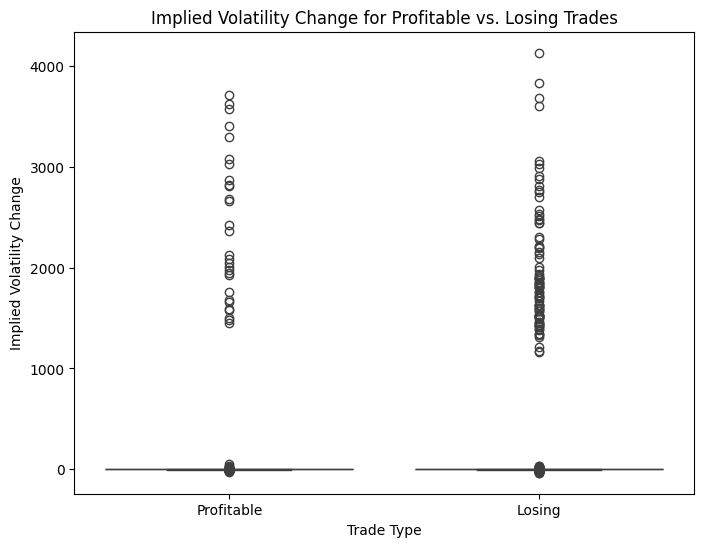

In [ ]:

#  conditions for profitable vs. losing trades
profitable_trades = df[df['Profit/Loss'] > 0]
losing_trades = df[df['Profit/Loss'] < 0]

# Comparing implied volatility
imp_vol_change_profitable = profitable_trades['Exit_imp_vol'] - profitable_trades['Entry_imp_vol']
imp_vol_change_losing = losing_trades['Exit_imp_vol'] - losing_trades['Entry_imp_vol']
print(imp_vol_change_profitable)
print(imp_vol_change_losing)
plot_df = pd.DataFrame({
    'Trade Type': ['Profitable'] * len(imp_vol_change_profitable) + ['Losing'] * len(imp_vol_change_losing),
    'Implied Volatility Change': imp_vol_change_profitable.tolist() + imp_vol_change_losing.tolist()
})

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Trade Type', y='Implied Volatility Change', data=plot_df)
plt.title('Implied Volatility Change for Profitable vs. Losing Trades')
plt.show()


In [ ]:
# Risk/Reward Ratio
df['Risk/Reward'] = df['Trgt%'] / abs(df['SL%'])
print(df['Risk/Reward'])



0             NaN
1             NaN
2        3.478261
3        3.478261
4        3.478261
          ...    
2647    16.000000
2648    16.000000
2649    16.000000
2650    16.000000
2651    16.000000
Name: Risk/Reward, Length: 2652, dtype: float64


In [ ]:
# Performance (Call vs. Put)
instrument_performance = df.groupby('InstrumentLeg')['Profit/Loss'].mean()

# Performance by Strike (ce_strike vs. pe_strike)
ce_strike_performance = df[df['InstrumentLeg'] == 'CE'].groupby('ce_strike')['Profit/Loss'].mean()
pe_strike_performance = df[df['InstrumentLeg'] == 'PE'].groupby('pe_strike')['Profit/Loss'].mean()
print(ce_strike_performance)
print(pe_strike_performance)


Series([], Name: Profit/Loss, dtype: float64)
Series([], Name: Profit/Loss, dtype: float64)


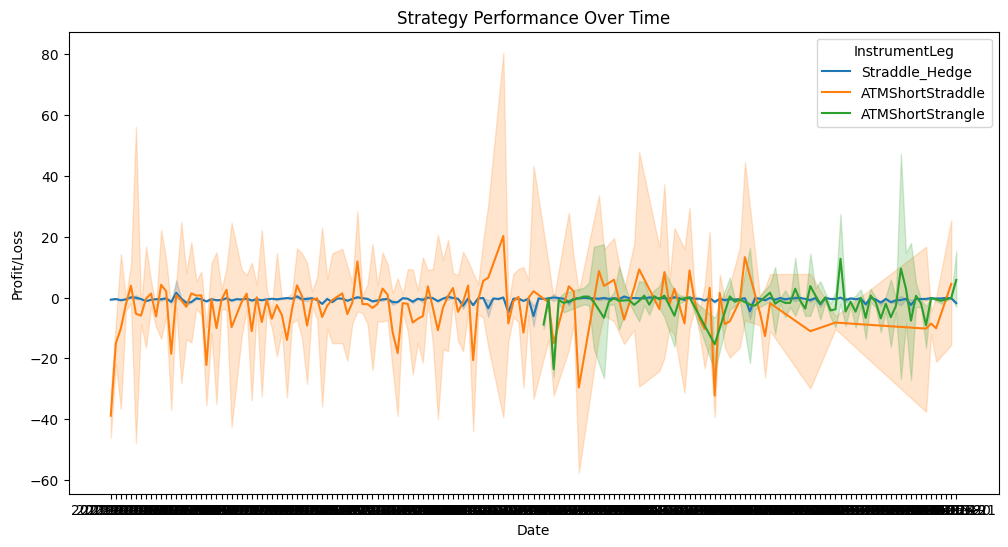

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart for strategy performance over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Profit/Loss', hue='InstrumentLeg', data=df)
plt.title('Strategy Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Profit/Loss')
plt.show()

In [ ]:
# Calculate the Interquartile Range (IQR) for 'Profit/Loss'
Q1 = df['Profit/Loss'].quantile(0.25)
Q3 = df['Profit/Loss'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = df[(df['Profit/Loss'] > upper_bound) | (df['Profit/Loss'] < lower_bound)]

# Display outliers
print(outliers)

          Index                Positions  Account Margin Expiry/Non Expiry  \
2     BANKNIFTY  BANKNIFTY23O0443900CE_2        200000.0            Expiry   
3     BANKNIFTY  BANKNIFTY23O0443900PE_2        200000.0            Expiry   
8     BANKNIFTY  BANKNIFTY23O0443900CE_2        200000.0            Expiry   
9     BANKNIFTY  BANKNIFTY23O0443900PE_2        200000.0            Expiry   
12    BANKNIFTY  BANKNIFTY23O0443900CE_2        200000.0            Expiry   
...         ...                      ...             ...               ...   
2637     SENSEX     SENSEX2462176700PE_2      17393642.7            Expiry   
2639     SENSEX     SENSEX2462176500PE_3      17393642.7            Expiry   
2641     SENSEX     SENSEX2462176300PE_4      17393642.7            Expiry   
2645     SENSEX     SENSEX2462176900PE_6      17393642.7            Expiry   
2647     SENSEX     SENSEX2462176500PE_7      17393642.7            Expiry   

      Entry                                       EntryOrderID 

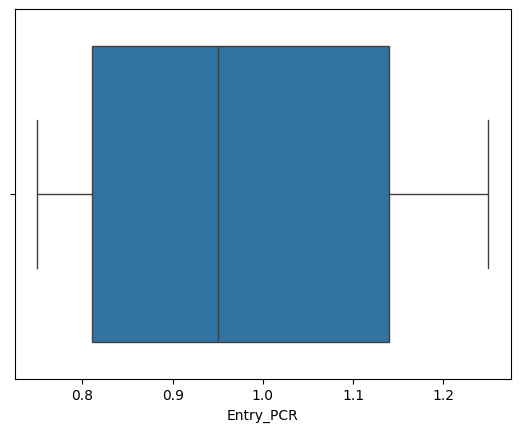

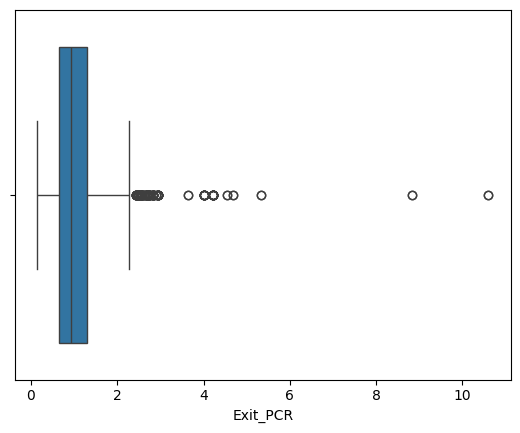

In [ ]:
# Visualize Entry_PCR and Exit_PCR distributions
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Entry_PCR'])
plt.show()
sns.boxplot(x=df['Exit_PCR'])
plt.show()

# Optionally, calculate z-scores to identify outliers statistically
from scipy import stats
df['Entry_PCR_zscore'] = stats.zscore(df['Entry_PCR'])
df['Exit_PCR_zscore'] = stats.zscore(df['Exit_PCR'])